In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# 한글 폰트 깨짐 현상 방지
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin':
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')

In [3]:
train = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 서울시 따릉이 대여량 예측 경진대회/따릉이/train.csv')
test = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 서울시 따릉이 대여량 예측 경진대회/따릉이/test.csv')

# 데이터 확인

In [4]:
train.head()

# count는 y target값 설정하기

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [6]:
train.shape, test.shape

((1459, 11), (715, 10))

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1459.0,1105.914325,631.338681,3.000,555.5000,1115.000,1651.000,2179.000
hour,1459.0,11.493489,6.922790,0.000,5.5000,11.000,17.500,23.000
hour_bef_temperature,1457.0,16.717433,5.239150,3.100,12.8000,16.600,20.100,30.000
hour_bef_precipitation,1457.0,0.031572,0.174917,0.000,0.0000,0.000,0.000,1.000
hour_bef_windspeed,1450.0,2.479034,1.378265,0.000,1.4000,2.300,3.400,8.000
hour_bef_humidity,1457.0,52.231297,20.370387,7.000,36.0000,51.000,69.000,99.000
hour_bef_visibility,1457.0,1405.216884,583.131708,78.000,879.0000,1577.000,1994.000,2000.000
hour_bef_ozone,1383.0,0.039149,0.019509,0.003,0.0255,0.039,0.052,0.125
hour_bef_pm10,1369.0,57.168736,31.771019,9.000,36.0000,51.000,69.000,269.000
hour_bef_pm2.5,1342.0,30.327124,14.713252,8.000,20.0000,26.000,37.000,90.000


### visibility가 너무 높음 
### 상관관계 살펴보고 빼고 할 지 정해보자

In [8]:
# train 열 확인
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [9]:
# trian.info() 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


## columns name
1. id : 날짜와 시간별 id
2. hour_bef_temperature : 1시간 전 기온
3. hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
4. hour_bef_windspeed : 1시간 전 풍속(평균)
5. hour_bef_humidity : 1시간 전 습도
6. hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
7. hour_bef_ozone : 1시간 전 오존
8. hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
9. hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
10. count : 시간에 따른 따릉이 대여 수


In [10]:
# 결측치 확인
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

### - ozone, pm10, pm2.5에 결측치가 많음 
### - 한 번 살펴보자
### - 결측치 숫자가 적은 컬럼들은 평균값으로 대체

In [11]:
# 결측치가 많은 컬럼들 확인
print(train['hour_bef_ozone'][train['hour_bef_ozone'].isnull()])
print(train['hour_bef_pm10'][train['hour_bef_pm10'].isnull()])
print(train['hour_bef_pm2.5'][train['hour_bef_pm2.5'].isnull()])

14     NaN
44     NaN
46     NaN
84     NaN
122    NaN
        ..
1283   NaN
1322   NaN
1329   NaN
1361   NaN
1391   NaN
Name: hour_bef_ozone, Length: 76, dtype: float64
14     NaN
46     NaN
84     NaN
100    NaN
129    NaN
        ..
1329   NaN
1338   NaN
1361   NaN
1391   NaN
1398   NaN
Name: hour_bef_pm10, Length: 90, dtype: float64
14     NaN
33     NaN
46     NaN
84     NaN
100    NaN
        ..
1361   NaN
1378   NaN
1391   NaN
1398   NaN
1410   NaN
Name: hour_bef_pm2.5, Length: 117, dtype: float64


### 전부 다 비어있는 값이므로 그냥 데이터 분석에서 제외시키자.

In [12]:
# id도 분석에 쓸모 없으니 삭제
# hour_bef_visibility도 수가 너무 크기 때문에 삭제시키고 진행
train = train.drop(columns = ['id','hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5','hour_bef_visibility'])
test = test.drop(columns = ['id','hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5','hour_bef_visibility'])

In [13]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())
train['hour_bef_precipitation'] = train['hour_bef_precipitation'].fillna(value = train['hour_bef_temperature'].mean())
train['hour_bef_windspeed'] = train['hour_bef_windspeed'].fillna(value = train['hour_bef_temperature'].mean())
train['hour_bef_humidity'] = train['hour_bef_humidity'].fillna(value = train['hour_bef_temperature'].mean())

In [14]:
test['hour_bef_temperature'] = test['hour_bef_temperature'].fillna(value = test['hour_bef_temperature'].mean())
test['hour_bef_precipitation'] = test['hour_bef_precipitation'].fillna(value = test['hour_bef_temperature'].mean())
test['hour_bef_windspeed'] = test['hour_bef_windspeed'].fillna(value = test['hour_bef_temperature'].mean())
test['hour_bef_humidity'] = test['hour_bef_humidity'].fillna(value = test['hour_bef_temperature'].mean())

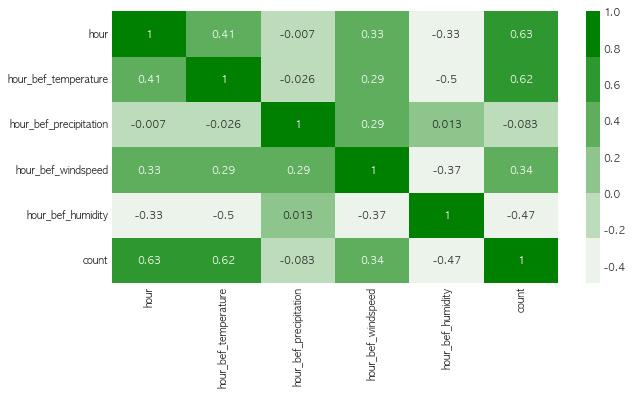

In [15]:
# 데이터들의 상관관계 살펴보기
train.corr()

plt.figure(figsize = (10,5))
corr_map = sns.light_palette("green")  
sns.heatmap(train.corr(), annot = True, cmap = corr_map)

plt.show()

In [16]:
# 다중공산성도 살펴보기
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(train.values, i)  
                    for i in range(train.shape[1])] 
vif['features'] = train.columns

print(vif)

         VIF                features
0   6.214725                    hour
1  10.799901    hour_bef_temperature
2   1.141580  hour_bef_precipitation
3   3.974397      hour_bef_windspeed
4   3.857748       hour_bef_humidity
5   6.364872                   count


In [17]:
# 온도가 살짝 10을 넘긴 하지만 그대로 진행해보기

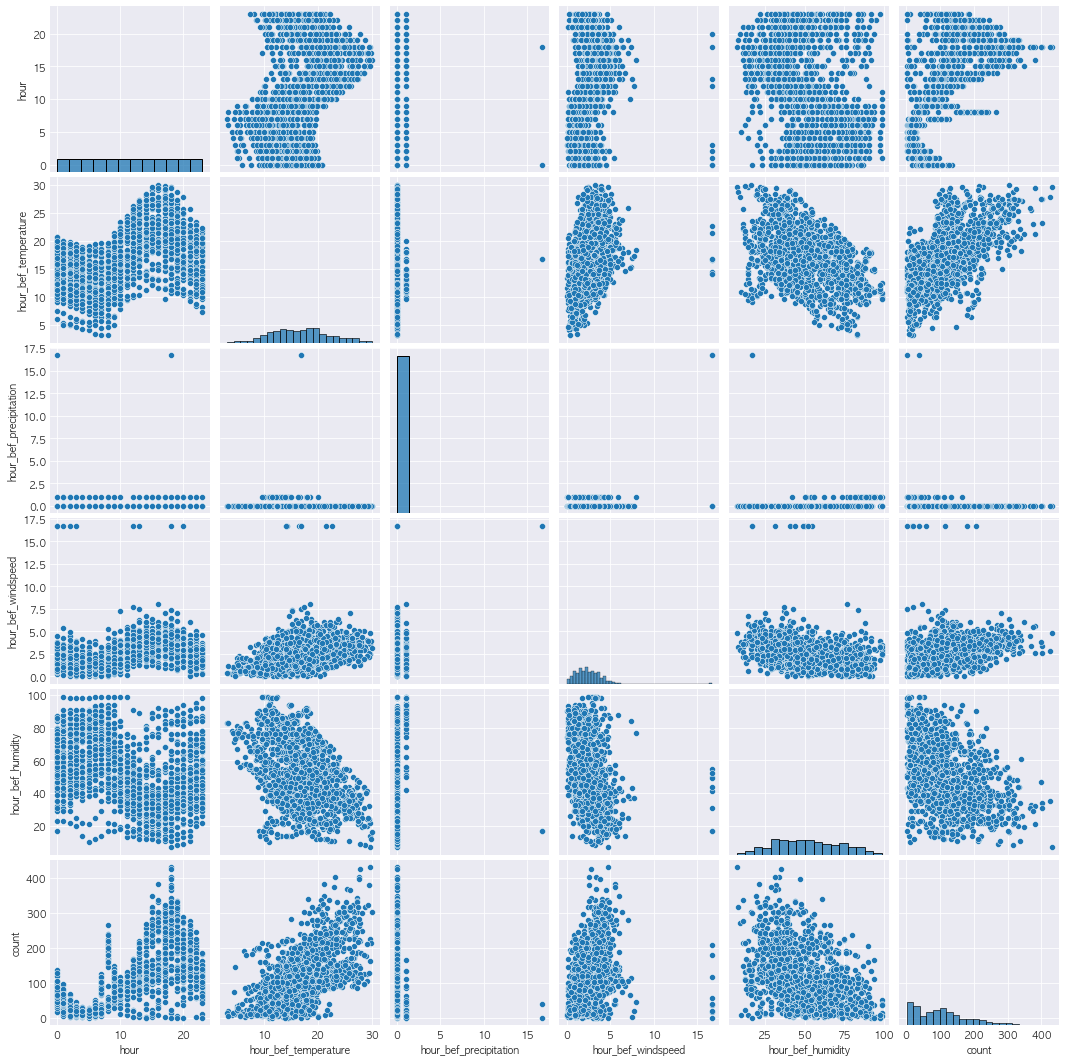

In [18]:
# 변수들의 상관관계를 더 살펴보자
sns.pairplot(train)

plt.show()

### 1. hour, temparture는 올라갈수록 count가 올라감
### 2. humidity는 올라갈수록 점점 내려감
### 3. windspeed는 애매하지만 올라갈수록 count가 올라가긴 함. 단, 바람이 너무 쎄지면 아예 자전거를 안탐
### 4. 비가 오면 잘 안타고 비가 안 오면 count가 올라감

# 모델링

In [19]:
# y 변수 만들기
target = train['count']

train = train.drop(columns = ['count'])

In [20]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(train, target, \
                                                   test_size = 0.2)

# GridSearch
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[3,4,5], #when use hyperthread, xgboost may become slower
              'learning_rate': [.03, .07, .05], #so called `eta` value
              'max_depth': [5, 6],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7, 0.8],
              'gamma' : [5,10,15],
              'n_estimators': [500, 1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_TRAIN,
         Y_TRAIN)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [22]:
from xgboost import XGBRegressor
model = XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.03, max_depth = 5, 
                     min_child_weight = 4, n_estimators = 500, subsample = 0.7
                     , gamma = 15, nthread = 3
                    )

model.fit(X_TRAIN, Y_TRAIN)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=15, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=3, nthread=3,
             num_parallel_tree=1, predictor='auto', ...)

In [23]:
y_test_predicted = model.predict(test)

In [24]:
Y_TEST_predicted = model.predict(X_TEST)

In [25]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Y_TEST, Y_TEST_predicted) 
np.sqrt(MSE)

41.745215082367935

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_TEST, Y_TEST_predicted)
print(r2)

0.7583548770809342


In [27]:
submit = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 서울시 따릉이 대여량 예측 경진대회/따릉이/submission.csv')

In [28]:
submit['count'] = (y_test_predicted)
submit.head()

,id,count
0,0,86.867638
1,1,263.957825
2,2,61.787384
3,4,19.536777
4,5,46.162033


In [29]:
submit.to_csv('./submit1.csv', index=False)